# Biodiversity in US National Parks Project

In this project, data regarding endangered species found in US national park locations will be interpreted and explored.

The data is provided by [Codecademy.com](https://www.codecademy.com) and is inspired by true data

By scoping the project, the overall process can be made easier due to a thought-out structure being implemented

### Project Goals

This project is viewed through the lense of a national park analyst looking to help preserve the diversity in the national parks as well as understanding which species are the most at-risk.

Some specific questions posed are:
- What is the distribution of conservation status for animals?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which species were spotted the most at each park?

### Data

The data provided is within two `csv` files, the first containing information about each species and the second contains information about species sightings in each park over a given week. The data is sufficent to meet the project goals.

### Analysis

Based upon the goals outlined above, descriptive statistical techniques and visuallisations will be used to gain a better understanding of the data. Some statistical significance tests will also be performed.

### Evalutaion

It is beneficial to revist goals frequently to ensure any analysis performed is in line with the project goals. Furthermore it is advisable to reflect on what has been learned thorughout the project and if any of the posed questions could not be answered.

We begin by importing all generally useful Python modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In order to efficiently analyse the data, it is loaded into `Dataframes`:

In [2]:
species = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")

Now each datset is going to be explored in turn to obtain a better understanding of its structure and contents.

In [3]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [4]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


By inspecting the species data we can see there are 4 columns:
- category - the taxonomy of a given species
- scientific_name - the scientific name of a given species
- common_names - the common names of a given species
- conservation_status - the species' conservation status

We can also see that the dataset contains 5824 rows and that interestingly only 191 rows of `conservation_status` contain values.

Now we investigate each column independantly.

In [5]:
species.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [6]:
species.category.value_counts()

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64

We can see that the species are divided into 7 taxonomical groupings with plantlife being significantly more prevalent. 

Next we explore `scientific_name`.

In [7]:
species.scientific_name.nunique()

5541

In [8]:
species.scientific_name.duplicated().sum()

283

By investigating further we can see that there are 283 occurences of repitition within the `scientific_name` column which could have easily been missed.

In [9]:
species.scientific_name[species.scientific_name.duplicated()]

3017                      Cervus elaphus
3019              Odocoileus virginianus
3020                         Canis lupus
3022                       Puma concolor
3025                    Lutra canadensis
                      ...               
5619    Panicum rigidulum var. rigidulum
5638                      Setaria pumila
5640                    Vulpia bromoides
5643                       Vulpia myuros
5750                     Rosa eglanteria
Name: scientific_name, Length: 283, dtype: object

In [10]:
species[species.scientific_name == 'Cervus elaphus']

,category,scientific_name,common_names,conservation_status
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,NaN


In [11]:
species[species.scientific_name == 'Canis lupus']

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


By inspecting examples of repitions we can see that the repeats differ in at least one column each.

How these duplicates will be treated will be decided later.

Inspecting the `common_names` column is unlikely to be enlightening so this column is skipped until further analysis is needed.
Instead we look at `conservation_status`

In [12]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

Clsoer inspection of `conservation_status` shows the 5 categories each species can be placed under.

Due to the number of species that are assigned `nan`, it is clear that these species are those which are not currently threatened or under intervention. In order to remove all instances of `nan` within the data, such occurences are replaced, since the other conservation categories loosely follow the IUCN conservation categories, the `nan` values will be replaced by `'Least Concern'`.

In [13]:
species.fillna(value={'conservation_status':'Least Concern'}, inplace=True)

In [14]:
species.conservation_status.unique()

array(['Least Concern', 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [15]:
species.conservation_status.value_counts()

Least Concern         5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

Now we can see that the vast majority of species in the data are not in danger nor placed in recovery, we can also see that there is a small number of species (26) that are in a dire situation.

Now we shall explore the `observations` data.

In [16]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [17]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


Here we can see the `observations` data contains 23,296 rows across 3 columns:
- scientific_name - The same as prior
- park_name - The name of the US National Park the species was sighted in
- observations - The number of sightings of a given species over a week period

We again begin to explore the columns.

In [18]:
observations.scientific_name.nunique()

5541

This value is the same as for the other dataset, implying that both datasets refer to the same species.

We can verify this easily:

In [19]:
(np.sort(species.scientific_name.unique()) == np.sort(observations.scientific_name.unique())).all()

True

As both datasets refer to the same species, it may also be beneficial to combine both datasets into a single, larger dataset. This will be explored later.

One could check for duplicates here however it would be ill advised, it is highly likely that certain species are present across each park

Now we look at `park_name`

In [20]:
observations.park_name.value_counts()

Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: park_name, dtype: int64

Here we can see that there are 4 parks considered in the dataset and that each are equally present within the data. Note that these values represent the total number of species observed in each park. 

In [21]:
observations.groupby('park_name').sum()

,observations
park_name,
Bryce National Park,576025
Great Smoky Mountains National Park,431820
Yellowstone National Park,1443562
Yosemite National Park,863332


In [22]:
observations.observations.sum()

3314739

Some interesting things to note from the data: 
- The Bryce national park is almost 15 times smaller than the Great Smoky national park. The prior having a greater total of species observations could indicate a higher concentration of wildlife in the prior or perhaps greater difficulty in spotting wildlife in the latter. 
- Each park having an equal number of different species observed could indicate that the data is taken from a larger set that has been restricted to focus on the given 5541 species.
- Since there are only 5541 different species within the dataset, it is interesting that each park has 5824 species instances, further of 5541 species across 4 parks, it would be expected that there are at most 22,164 rows in the `observations` data and not 23,296.

The final point indicates to us that some species are present more than 4 times within the dataset, we will investigate these further:

In [23]:
observations.duplicated().sum()

15

In [24]:
observations[observations.duplicated()]

,scientific_name,park_name,observations
7263,Echinochloa crus-galli,Great Smoky Mountains National Park,62
8710,Streptopelia decaocto,Yellowstone National Park,255
10038,Plantago major,Great Smoky Mountains National Park,90
10674,Arctium minus,Yosemite National Park,162
12381,Eleocharis palustris,Great Smoky Mountains National Park,62
13372,Hesperis matronalis,Bryce National Park,124
16741,Prunella vulgaris,Great Smoky Mountains National Park,75
17378,Potentilla norvegica,Yosemite National Park,148
17577,Spilogale putorius,Yellowstone National Park,256
18141,Poa compressa,Great Smoky Mountains National Park,80


These rows are those that are exact duplicates of others found in the dataset, looking at one species in particular:

In [25]:
observations[observations.scientific_name == 'Arctium minus']

,scientific_name,park_name,observations
513,Arctium minus,Yosemite National Park,162
2054,Arctium minus,Bryce National Park,66
4017,Arctium minus,Yellowstone National Park,234
9835,Arctium minus,Yellowstone National Park,255
10674,Arctium minus,Yosemite National Park,162
16394,Arctium minus,Bryce National Park,142
18320,Arctium minus,Great Smoky Mountains National Park,76
19102,Arctium minus,Great Smoky Mountains National Park,63


Here we can see that where we would expect to see at most 4 occurences of the species across each park, it actually has 2 occurences at each. As we do not have more information of the nature of these occurences (error, multiple sources of observation etc.), each will be considered correct and the observations will be collected by species and park.

In [26]:
observations = observations.groupby(['scientific_name', 'park_name']).sum().reset_index()

In [27]:
observations.head()

,scientific_name,park_name,observations
0,Abies bifolia,Bryce National Park,109
1,Abies bifolia,Great Smoky Mountains National Park,72
2,Abies bifolia,Yellowstone National Park,215
3,Abies bifolia,Yosemite National Park,136
4,Abies concolor,Bryce National Park,83


In [28]:
observations[observations.scientific_name == 'Arctium minus']

,scientific_name,park_name,observations
1472,Arctium minus,Bryce National Park,208
1473,Arctium minus,Great Smoky Mountains National Park,139
1474,Arctium minus,Yellowstone National Park,489
1475,Arctium minus,Yosemite National Park,324


In [29]:
observations.park_name.value_counts()

Bryce National Park                    5541
Great Smoky Mountains National Park    5541
Yellowstone National Park              5541
Yosemite National Park                 5541
Name: park_name, dtype: int64

In [30]:
observations.groupby('park_name').sum()

,observations
park_name,
Bryce National Park,576025
Great Smoky Mountains National Park,431820
Yellowstone National Park,1443562
Yosemite National Park,863332


Here we can see that the data structure has not changed however now each species appears in the data at most 4 times.

After exploring the `observation` data, we return to consider the duplicates within the `species` data. Of the two examples of repitition observed prior:
- In the first example, the repitition was due to having slightly different common names
- For the second, the differing conservation status tells us that for a given species, the conservation status may be different across each park

For the first case, such repeats will be eliminated by grouping by `scientific_name`, `category` and `conservation_status` and then concatinating `common_names` together:

In [31]:
species = species.groupby(['category','scientific_name', 'conservation_status'])['common_names'].apply(', '.join).reset_index()

In [32]:
species.head()

,category,scientific_name,conservation_status,common_names
0,Amphibian,Acris crepitans crepitans,Least Concern,Northern Cricket Frog
1,Amphibian,Ambystoma maculatum,Least Concern,Spotted Salamander
2,Amphibian,Ambystoma mavortium melanostictum,Least Concern,Blotched Tiger Salamander
3,Amphibian,Ambystoma opacum,Least Concern,Marbled Salamander
4,Amphibian,Ambystoma talpoideum,Least Concern,Mole Salamander


We see that for non-repeat `scientific_names`, nothing has changed. If we look again at the example prior:

In [33]:
species[species.scientific_name == 'Cervus elaphus']

,category,scientific_name,conservation_status,common_names
709,Mammal,Cervus elaphus,Least Concern,"Wapiti Or Elk, Rocky Mountain Elk"


Now rather than having two rows for `Cervus elpahus` with very similar entries, we have combined the rows into one.

Now if we look at the duplicates that remain which will be of the second form:

In [34]:
species[species.scientific_name.duplicated()]

,category,scientific_name,conservation_status,common_names
665,Fish,Oncorhynchus mykiss,Threatened,Rainbow Trout
706,Mammal,Canis lupus,In Recovery,"Gray Wolf, Wolf"


In [35]:
species[species.scientific_name.isin(['Canis lupus', 'Oncorhynchus mykiss'])]

,category,scientific_name,conservation_status,common_names
664,Fish,Oncorhynchus mykiss,Least Concern,Rainbow Trout
665,Fish,Oncorhynchus mykiss,Threatened,Rainbow Trout
705,Mammal,Canis lupus,Endangered,"Gray Wolf, Gray Wolf, Wolf"
706,Mammal,Canis lupus,In Recovery,"Gray Wolf, Wolf"


In this case it is best to leave such duplicates in the dataset. Unfortunately it is not possible to deduce from which national park these particular situations arise.

## Analysis
Now that the datasets have been explored, we may continue on to answer the posed questions, first we look at the distribution of `conservation_status`

We can create a table using `pd.crosstab` in order to more closely see the distribution of `conservation_status` across animal species:

In [36]:
fauna_tab = pd.crosstab(
species.conservation_status,
species.category[~species.category.isin(['Vascular Plant', 'Nonvascular Plant'])])
fauna_tab

category,Amphibian,Bird,Fish,Mammal,Reptile
conservation_status,,,,,
Endangered,1,4,3,6,0
In Recovery,0,3,0,1,0
Least Concern,72,413,115,146,73
Species of Concern,4,68,4,22,5
Threatened,2,0,4,2,0


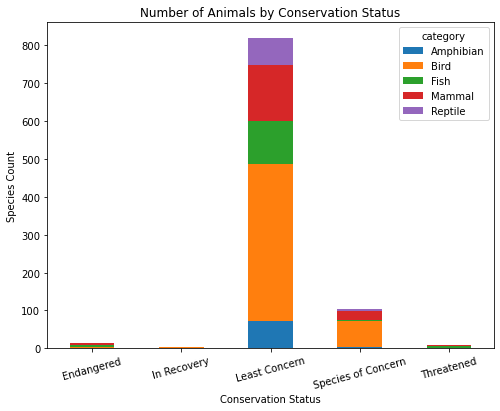

In [37]:
fauna_tab.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Number of Animals by Conservation Status')
plt.ylabel('Species Count')
plt.xlabel('Conservation Status')
plt.xticks(rotation=15)
plt.show()

Here we can see that for the vast majority of animals, there is little concern. In order to make clearer observations, the species with least concern will be omitted:

In [38]:
threat_fauna_tab = pd.crosstab(
species.conservation_status[species.conservation_status != 'Least Concern'],
species.category[~species.category.isin(['Vascular Plant', 'Nonvascular Plant'])])
threat_fauna_tab

category,Amphibian,Bird,Fish,Mammal,Reptile
conservation_status,,,,,
Endangered,1,4,3,6,0
In Recovery,0,3,0,1,0
Species of Concern,4,68,4,22,5
Threatened,2,0,4,2,0


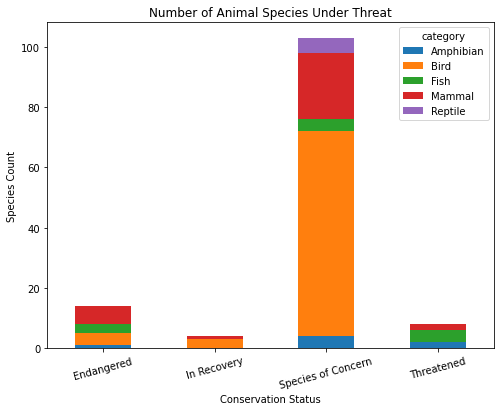

In [39]:
threat_fauna_tab.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Number of Animal Species Under Threat')
plt.ylabel('Species Count')
plt.xlabel('Conservation Status')
plt.xticks(rotation=15)
plt.show()

Now that we can see the threatened animals more closely, we can see that birds are the most prevalent category and reptiles the least, followed closely by amphibians. Interestingly, the only categories in recovery are bird and mammal species. 

This leads directly into the next posed question, are certain types of species more likely to be endangered?

Firstly, we will group the species under two categories depending on if its conservation status is least concern:

In [40]:
species["under_threat"] = species.conservation_status != 'Least Concern'

Then we can create a table of frequencies:

In [41]:
threat_tab = pd.crosstab(species.category,
           species.under_threat)
threat_tab

under_threat,False,True
category,,
Amphibian,72,7
Bird,413,75
Fish,115,11
Mammal,146,31
Nonvascular Plant,328,5
Reptile,73,5
Vascular Plant,4216,46


Here we can see clearly that birds, mammals and vascualr plants have a considerably higher number of species under threat. In cases like this, it may be beneficial to consider the proportion of threatened species:

In [42]:
threat_tab['percent_threat'] = round(threat_tab[1] / (threat_tab[0] + threat_tab[1]) * 100, 3)
threat_tab

under_threat,False,True,percent_threat
category,,,
Amphibian,72,7,8.861
Bird,413,75,15.369
Fish,115,11,8.730
Mammal,146,31,17.514
Nonvascular Plant,328,5,1.502
Reptile,73,5,6.410
Vascular Plant,4216,46,1.079


With the proportions, we can see that although a greater number of bird species are under threat, a higher proportion of mammals are threatened. With such higher proportions than the other categories, bird and mammal species are much more likely to be threatened than other categories.

We can then investigate the association between species category and if said species is under threat, we do this by calculating the chi squre statistic from the orignal table of frequencies.

We will perform the first test on amphibians, brids and fish:

In [43]:
from scipy.stats import chi2_contingency
con_tab1 = [[72, 7],
            [413, 75],
            [115, 11]]
chi2_contingency(con_tab1)

(5.393682445661995,
 0.06741813561637366,
 2,
 array([[ 68.3982684 ,  10.6017316 ],
        [422.51082251,  65.48917749],
        [109.09090909,  16.90909091]]))

By looking at the chi^2 statistic (5.393...) and the p-value (0.067...), by using the standard significance level of 5%, we can determine that there does not seem to be any statistical significance between the variables.

We perform the test again on the remaining species categories:

In [44]:
con_tab2 = [[146, 31],
            [328, 5],
            [73, 5],
            [4216, 46]]
chi2_contingency(con_tab2)

(270.25029123916335,
 2.72468449550505e-58,
 3,
 array([[1.73824948e+02, 3.17505155e+00],
        [3.27026598e+02, 5.97340206e+00],
        [7.66008247e+01, 1.39917526e+00],
        [4.18554763e+03, 7.64523711e+01]]))

We can see here that the p-value is much lower than 5% hence the results are suggested to be significant. By comparing the inputted frequencies to the outputted expected, there are much more mammals and slightly more reptiles under threat in reality. This suggests that both reptiles and mammals have a significantly higher rate of being under threat than the other species.

Lastly we investigate the species observed most often at each park.

To more easily be able to find the maximum number of observations of each park, we pivot the `observations` dataframe:

In [45]:
obs_pivot = observations.pivot(columns='park_name', index='scientific_name', values='observations').reset_index()

In [46]:
obs_pivot.head()

park_name,scientific_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park
0,Abies bifolia,109,72,215,136
1,Abies concolor,83,101,241,205
2,Abies fraseri,109,81,218,110
3,Abietinella abietina,101,65,243,183
4,Abronia ammophila,92,72,222,137


Then for ease later as well as to keep column headings inline with existing headings, the park names are reformatted:

In [47]:
obs_pivot.rename(columns={'Bryce National Park' : 'bryce',
                          'Great Smoky Mountains National Park' : 'great_smoky',
                          'Yellowstone National Park' : 'yellowstone',
                          'Yosemite National Park' : 'yosemite'},
            inplace=True)

In [48]:
obs_pivot.head()

park_name,scientific_name,bryce,great_smoky,yellowstone,yosemite
0,Abies bifolia,109,72,215,136
1,Abies concolor,83,101,241,205
2,Abies fraseri,109,81,218,110
3,Abietinella abietina,101,65,243,183
4,Abronia ammophila,92,72,222,137


It would be possible to find the most observed species of each park from here, however before then, we will merge the now pivoted `obs_pivot` and `species` frames in order to have more information than just the scientific name of the species:

In [49]:
merged = pd.merge(species, obs_pivot)

In [50]:
merged.head()

,category,scientific_name,conservation_status,common_names,under_threat,bryce,great_smoky,yellowstone,yosemite
0,Amphibian,Acris crepitans crepitans,Least Concern,Northern Cricket Frog,False,112,59,228,132
1,Amphibian,Ambystoma maculatum,Least Concern,Spotted Salamander,False,92,51,233,163
2,Amphibian,Ambystoma mavortium melanostictum,Least Concern,Blotched Tiger Salamander,False,84,79,287,157
3,Amphibian,Ambystoma opacum,Least Concern,Marbled Salamander,False,115,78,301,167
4,Amphibian,Ambystoma talpoideum,Least Concern,Mole Salamander,False,105,82,254,105


Now that there is more information for the species, we find the index label of the column maxes corresponding to each park:

In [51]:
park_maxes = [
        merged['bryce'].idxmax(),
        merged['great_smoky'].idxmax(),
        merged['yellowstone'].idxmax(),
        merged['yosemite'].idxmax()
]
park_maxes

[214, 507, 3190, 3262]

Now that these are found, we can select the corresponding species found at each label. The order in which the rows are selected we can see is the same order that the maxes were found.

In [52]:
merged.loc[park_maxes][['scientific_name', 'common_names', 'category', 'bryce', 'great_smoky', 'yellowstone', 'yosemite']]

,scientific_name,common_names,category,bryce,great_smoky,yellowstone,yosemite
214,Columba livia,"Rock Dove, Common Pigeon, Rock Dove, Rock Pige...",Bird,339,169,722,423
507,Streptopelia decaocto,"Eurasian Collared-Dove, Eurasian Collared Dove...",Bird,301,256,771,457
3190,Holcus lanatus,"Common Velvet Grass, Velvetgrass, Common Velve...",Vascular Plant,296,216,805,463
3262,Hypochaeris radicata,"Cat's Ear, Spotted Cat's-Ear, Spotted Cats-Ear...",Vascular Plant,294,195,726,505


For enlightenment we can also find the most observed species across all parks:

In [53]:
merged['total'] = merged.bryce + merged.great_smoky + merged.yellowstone + merged.yosemite

In [54]:
merged.head()

,category,scientific_name,conservation_status,common_names,under_threat,bryce,great_smoky,yellowstone,yosemite,total
0,Amphibian,Acris crepitans crepitans,Least Concern,Northern Cricket Frog,False,112,59,228,132,531
1,Amphibian,Ambystoma maculatum,Least Concern,Spotted Salamander,False,92,51,233,163,539
2,Amphibian,Ambystoma mavortium melanostictum,Least Concern,Blotched Tiger Salamander,False,84,79,287,157,607
3,Amphibian,Ambystoma opacum,Least Concern,Marbled Salamander,False,115,78,301,167,661
4,Amphibian,Ambystoma talpoideum,Least Concern,Mole Salamander,False,105,82,254,105,546


In [55]:
merged[['scientific_name', 'common_names','category', 'total']].sort_values(by='total', ascending=False).head(10)

,scientific_name,common_names,category,total
507,Streptopelia decaocto,"Eurasian Collared-Dove, Eurasian Collared Dove...",Bird,1785
3190,Holcus lanatus,"Common Velvet Grass, Velvetgrass, Common Velve...",Vascular Plant,1780
708,Castor canadensis,"American Beaver, Beaver, American Beaver, Beaver",Mammal,1725
3262,Hypochaeris radicata,"Cat's Ear, Spotted Cat's-Ear, Spotted Cats-Ear...",Vascular Plant,1720
809,Puma concolor,"Panther (Mountain Lion), Cougar, Mountain Lion...",Mammal,1711
808,Procyon lotor,"Common Raccoon, Raccoon, Common Raccoon, North...",Mammal,1692
214,Columba livia,"Rock Dove, Common Pigeon, Rock Dove, Rock Pige...",Bird,1653
768,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis, Little ...",Mammal,1547
1745,Bidens tripartita,"Stick-Tight, Three-Lobe Beggar-Ticks, Threelob...",Vascular Plant,1296
3957,Oxalis dillenii,"Dillen's Woodsorrel, Yellow Sorrel, Dillen's O...",Vascular Plant,1276


# Evaluation

All posed questions were able to be answered:
* The distribution of conservation status was shown visually as well as in tabular form
* Mammals and birds were shown to have a higher likelihood of being endangered
* Reptiles and mammals were shown to have a significant difference in conservation status compared to other categories
* The most observed species of each park were shown, in addition the most observed species across each park was shown

Towards the end of the project, a `merged` dataframe was created from the two constinuent datasets. In reality it may be beneficial to combine the datasets as in the original state, if an individual had no knowledge of scientific names of species, `observations` can only provide so much information.

Although fictitious data, the project allowed for interesting investigations as well as considerations for duplicates in the data.